# Problem 1 - Answers

## a) Plotting potential data from file 

<strong>Plot the potential given by the data in file <samp>Potential.txt</samp></strong><br>

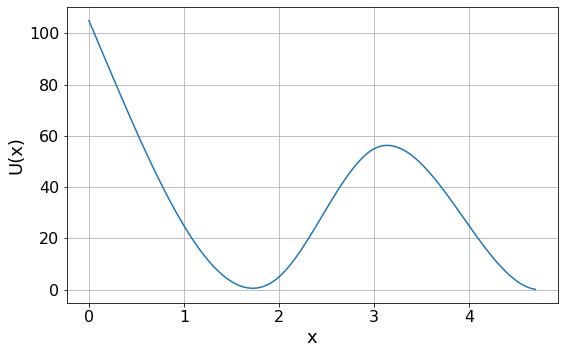

In [7]:
import numpy as np
from matplotlib import pyplot as plt

x, y = np.loadtxt(".\Potential.txt", unpack=True)

# Update plot parameters using values suggested in solutions to Session 1 computing worksheet
params = {
   'axes.labelsize': 18,
   'font.size': 18,
   'font.family': 'sans-serif',
   'font.serif': 'Arial',
   'legend.fontsize': 18,
   'xtick.labelsize': 16,
   'ytick.labelsize': 16, 
   'figure.figsize': [8.8, 8.8/1.618]
}

plt.rcParams.update(params)

plt.grid()
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("U(x)")
plt.show()

## b) Find equilibrium points
<strong>Find the equilibrium point(s) of the potential and show if they are stable or unstable.<br></strong>
You can use <samp>scipy.interpolate.interp1d</samp> to create a function which you can then solve using <samp>fsolve</samp>. Use the <samp>xtol</samp> parameter to specify a sensible value for the tolerance in your solution.
<br>
The equilibrium points are found where the derivative of the funciton is 0.
Equilibria are unstable if the second derivative is negative, stable if the second derivative is possitive, and inderterminate if the second derivative is 0.

Zero point 1 is as x = 1.724
The y value at this point is 0.544
This is a stable equilibrium point
Zero point 2 is as x = 3.140
The y value at this point is 56.267
This is an unstable equilibrium point


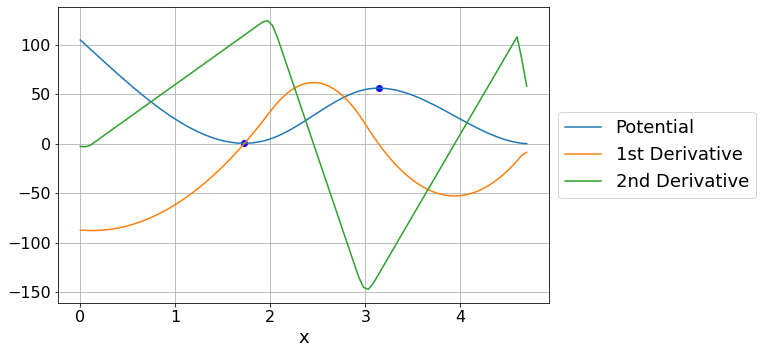

In [8]:
# Import scipy interpolation
from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Find first and second derivatives of the potential
derivative = np.gradient(y, x)
second_derivative = np.gradient(derivative, x)

# Create a function using scipy.interpolate.interp1d
f_derivative = interp1d(x, derivative)  # interp1d returns a function given a set of x and y points

# Use fsolve to find zero points
zero_point1 = fsolve(f_derivative, 1)
zero_point2 = fsolve(f_derivative, 2.7, xtol=1e-5)

# Interpolate to find the value of the potential and the second derivative at the turning points
f_potential = interp1d(x, y)
f_second = interp1d(x, second_derivative)

zeros = [zero_point1, zero_point2]

for i, zero in enumerate(zeros):
    # Find values of potential and second derivative
    zero_y = f_potential(zero)
    zero_point_second = f_second(zero)
    
    # Print and plot zero points to 3 s.f.
    print("Zero point %i is as x = %.3f" % (i + 1, zero))
    print("The y value at this point is %.3f" % zero_y)
          
    # Work out if equilibrium is stable
    if zero_point_second < 0:
          print("This is an unstable equilibrium point")
    elif zero_point_second > 0:
          print("This is a stable equilibrium point")
    else:
          print("This equilibrium point is indeterminate. Examine the graph or higher derivatives")
    
    # Plot zero points
    plt.plot(zero, zero_y, "o", color="b")

plt.plot(x, y, label="Potential")
plt.plot(x, derivative, label="1st Derivative")
plt.plot(x, second_derivative, label="2nd Derivative")
plt.grid()
plt.xlabel("x")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Put legend outside plot
plt.show()

## c) Find the maximum energy of a bound particle
The maximum energy of the bound particle is just less than value of the unstable equilibrium point 

The maximum allowed energy of the particle is 56.267


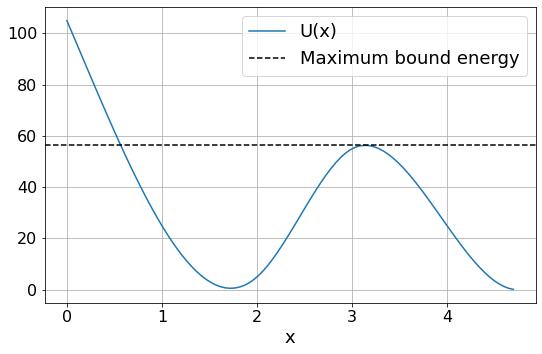

In [9]:
E_max = f_potential(zero_point2)
print("The maximum allowed energy of the particle is %.3f" % E_max)

plt.plot(x, y, label="U(x)")
plt.axhline(E_max, linestyle="--", label="Maximum bound energy", color="k")
plt.grid()
plt.xlabel("x")
plt.legend()
plt.show()

## d) Find the allowed region for this bound particle.
We have already found the rightmost point. We now need to find the point where U(x) = E_max

The particle is bound between the points 0.567 and 3.140


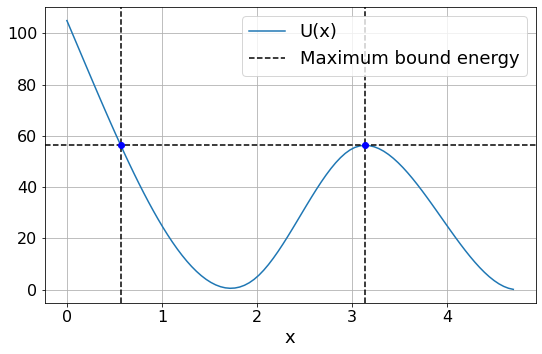

In [10]:
# Solve for the point where the lines U(x) and E_max intersect
# i.e. U(x) - E_max = 0

def f_intersection(x_in):
    intersect = f_potential(x_in) - E_max
    return intersect

x1 = fsolve(f_intersection, 0.5, xtol=1e-5)
x2 = zero_point2

print("The particle is bound between the points %.3f and %.3f" % (x1, x2))

plt.plot(x, y, label="U(x)")
plt.axhline(E_max, linestyle="--", label="Maximum bound energy", color="k")
plt.axvline(x1, linestyle="--", color="k")
plt.axvline(x2, linestyle="--", color="k")
plt.plot([x1, x2], [E_max, E_max], "o", color="b")
plt.grid()
plt.xlabel("x")
plt.legend()
plt.show()